In [5]:
#SVM,  temel olarak iki sınıfı bir doğru ya da düzlem ile birbirinlerinden ayırmaya çalışır. Bunu da sınırdaki elemanlara göre yapmaktadır.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
dataset=pd.read_csv('SosyalMedyaVeriseti.csv')
print(dataset)

     KullaniciID Cinsiyet  Yas  TahminiMaas  SatinAldiMi
0       15624510    Erkek   19        19000            0
1       15810944    Erkek   35        20000            0
2       15668575    Kadın   26        43000            0
3       15603246    Kadın   27        57000            0
4       15804002    Erkek   19        76000            0
..           ...      ...  ...          ...          ...
395     15691863    Kadın   46        41000            1
396     15706071    Erkek   51        23000            1
397     15654296    Kadın   50        20000            1
398     15755018    Erkek   36        33000            0
399     15594041    Kadın   49        36000            1

[400 rows x 5 columns]


In [6]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [7]:
#400 adet veri var: 300 eğitim, 100 test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
#yaş ve maaş için feature scaling yapalım:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
#modeli oluşturma
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


/var/folders/49/b8_gp7sj3gz3p9v2sm33smfc0000gn/T/ipykernel_38100/3394587104.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


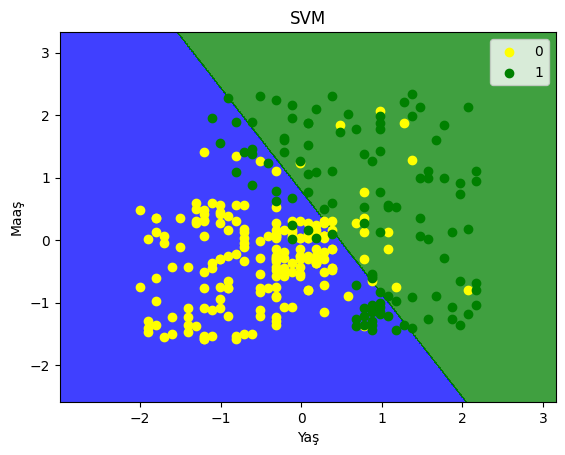

In [10]:
#Testler sonucunda 10 adet hata görülmüştür
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('SVM')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()